  # Python for Data Science Bootcamp
  ## Review Data Munging and Matplotlib

Import the yelp_reviews.csv file as a Dataframe

In [7]:
import pandas as pd
data = pd.read_csv('yelp_reviews_sample.csv')
print data.head()
print data.info()
print data.describe().T

                   business_name               review_id  \
0  Thai Pan Fresh Exotic Cuisine  0ESSqLfOae77muWTv_zUqA   
1                     Salon Lola  VyAKIaj_Rmsf_ZCHcGJyUw   
2         Chipotle Mexican Grill  DusrkpkTGPGkqK13xO1TZg   
3                     Sam's Deli  A5FL-YYXnr2hnvXQbgkkrQ   
4                          Petco  SzhIWfzLHUZfiAaVTtKHxw   

                  user_id stars review_date  \
0  r-t7IiTSD0QZdt8lOUCqeQ     3  2011-02-11   
1  SS85hfTApRnbTPcJadra8A     5  2010-05-30   
2  xAVu2pZ6nIvkdHh8vGs84Q     3  2011-11-26   
3  Xuvj2Fq6c3mCmplVG7h21w     4  2013-10-10   
4  jHH_UDpCnF-YTnveyoMTIA     1  2012-09-02   

                                         review_text  funny  useful  cool  
0  Lately i have been feeling homesick for asian ...      1       1     1  
1  I love Marilo!  She understands my hair type a...      0       0     0  
2  Standard Chipotle fare - consistently good; no...      0       0     0  
3         Very good prices with quality ingredients.

Investigate the data and see if anything needs cleaning.  Hint: Check the unique values and value_counts for stars column.

In [8]:
print data.stars.unique()
print data.stars.value_counts()

['3' '5' '4' '1' '2' '?']
5    5842
4    5371
3    2334
2    1481
1    1348
?      14
Name: stars, dtype: int64


Clean the data by removing the reviews with '?' for stars rating

In [9]:
data = data[data.stars!='?']

Replace the stars values that are text with integers

In [10]:
# Replace text with intgers
data.stars.replace(['1','2','3','4','5'],[1,2,3,4,5], inplace=True)

# Or convert data type to integer
# data.stars = data.stars.astype(int)
# data.stars = data.stars.apply(int)

print data.info()
print data.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16376 entries, 0 to 16389
Data columns (total 9 columns):
business_name    16376 non-null object
review_id        16376 non-null object
user_id          16376 non-null object
stars            16376 non-null int64
review_date      16376 non-null object
review_text      16376 non-null object
funny            16376 non-null int64
useful           16376 non-null int64
cool             16376 non-null int64
dtypes: int64(4), object(5)
memory usage: 1.2+ MB
None
          count      mean       std  min  25%  50%  75%   max
stars   16376.0  3.786395  1.247527  1.0  3.0  4.0  5.0   5.0
funny   16376.0  0.607169  1.774147  0.0  0.0  0.0  1.0  70.0
useful  16376.0  1.250916  2.084798  0.0  0.0  1.0  2.0  38.0
cool    16376.0  0.764045  1.784997  0.0  0.0  0.0  1.0  36.0


How many 5 star reviews does Lo-Lo's Chicken & Waffles have?

In [11]:
print data.business_name[
    (data.business_name=="Lo-Lo's Chicken & Waffles")&(data.stars==5)
    ].count()

print data.stars[
    data.business_name=="Lo-Lo's Chicken & Waffles"
    ].value_counts()

20
5    20
4    12
3     5
2     2
1     2
Name: stars, dtype: int64


What's the most number of cool votes a review received?

In [12]:
print data.cool.max()

36


In [13]:
print data[['business_name','review_text']][data.cool == data.cool.max()]

         business_name                                        review_text
4555   Rainforest Cafe  I would rather be a freegan and dumpster dive ...
10490        Dyno Comp  Best shop in town.\rEvery employee at Dyno-Com...


Which business has the most reviews? (hint: use .value_counts())

In [22]:
data.business_name.value_counts()

Pita Jungle                                     94
Oregano's Pizza Bistro                          72
Pizzeria Bianco                                 69
Cornish Pasty Company                           58
Phoenix Sky Harbor International Airport        57
FEZ                                             52
Five Guys Burgers and Fries                     49
Matt's Big Breakfast                            48
Four Peaks Brewing Co                           44
True Food Kitchen                               43
Postino Arcadia                                 42
Lo-Lo's Chicken & Waffles                       41
Smashburger                                     40
Hula's Modern Tiki                              39
Lux                                             39
Chompie's Deli                                  38
Chelsea's Kitchen                               38
Starbucks                                       37
The Parlor                                      35
Cibo                           

Create a scatter plot of the average star rating vs. average cool review per business (Hint: Use groupby)

In [15]:
avg_rating = data.groupby('business_name')['stars','cool'].mean()
avg_rating.head()

,stars,cool
business_name,,
#1Brothers Pizza,1.000000,1.000000
101 Bistro,3.000000,2.000000
1130 The Restaurant,2.857143,0.142857
16th Hole at The Phoenix Open,5.000000,0.000000
16th Street Sports Bar & Grill,4.000000,1.000000


(1, 5)

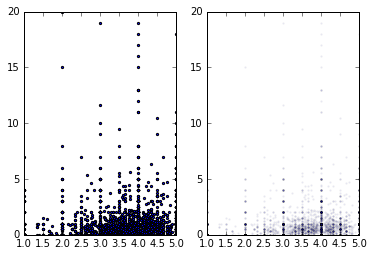

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.scatter(avg_rating.stars, avg_rating.cool, s=5, alpha=1)
plt.ylim([0,20])
plt.xlim([1,5])
ax2 = fig.add_subplot(122)
ax2.scatter(avg_rating.stars.values, avg_rating.cool.values, s=2, alpha=.05)
plt.ylim([0,20])
plt.xlim([1,5])

Bonus:  Use google and Matplotlib documentation to figure out how to change the marker size and transparency